In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_complete = pd.read_csv("csvFiles/Main_Scooter(20percent).csv")

In [3]:
data_complete = data_complete.dropna()
data_complete['Zipcode'] = data_complete['Zipcode'].astype(str)
data_complete = data_complete.sort_values(by=['Month', 'Day'])
data_complete.reset_index(inplace = True, drop = True)

In [4]:
what_time = data_complete['Hour'] == 6

data_morning = data_complete[what_time]

p_type =  data_complete['Poverty Type'] == 'Low'
    
data_sub = data_morning[p_type]


data_morning = data_morning.dropna()
data_morning = data_morning.sort_values(by=['Month', 'Day'])
data_morning.reset_index(inplace = True, drop = True)


C:\Users\david\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [5]:
dates = data_morning.Date.unique()


In [6]:
data_sub_gr = data_sub.groupby(["Month", "Day"])
data_morning_gr = data_morning.groupby(["Month", "Day"])

totals = data_sub_gr['NumberAvailable'].sum()

overall = data_morning_gr['NumberAvailable'].sum()

percent = (totals.values / overall.values)*100

y_value = percent


In [7]:
data_morning = data_morning[['CompanyName', 'NumberAvailable', 'Zipcode', 'Poverty Rate', 'Poverty Type',
                            'Hour', 'Day','Month', 'Date']]

#Save new df to CSV
   # Note to avoid any issues later, use encoding="utf-8"
data_morning.to_csv("csvFiles/6AM_Scooter(20percent).csv", encoding="utf-8", index=False)

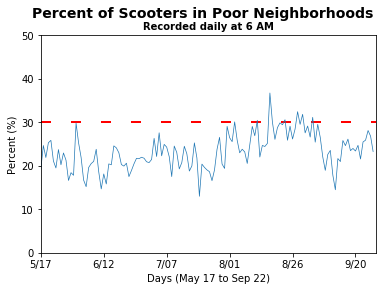

In [8]:
fig, ax = plt.subplots()

fig.suptitle("Percent of Scooters in Poor Neighborhoods", fontsize=14, fontweight="bold")
plt.title("Recorded daily at 6 AM", fontsize=10, fontweight="bold")
ax.set_xlim(0, len(totals))
ax.set_ylim(0, 50)
ax.set_xlabel("Days (May 17 to Sep 22)")
ax.set_ylabel("Percent (%)")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.axhline(y=30, dashes = [5,10], linewidth=2, color='r')
ax.plot(dates, y_value, linewidth=0.7)


plt.savefig("Images/6AM_Line_Poor(20percent).png")
plt.show()